# Построение пи-функции последовательности Фибоначчи

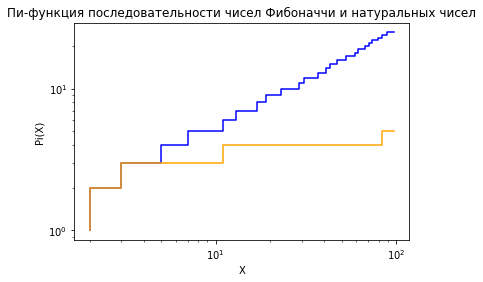

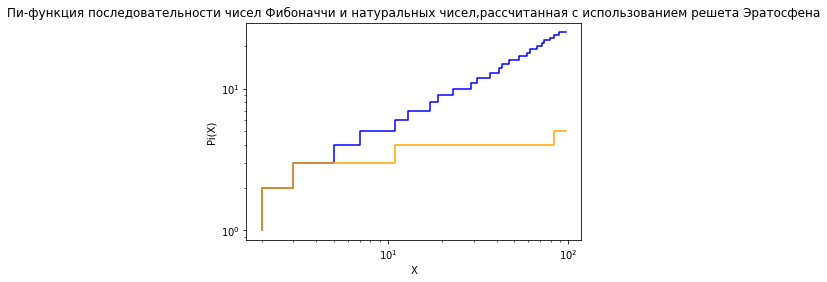

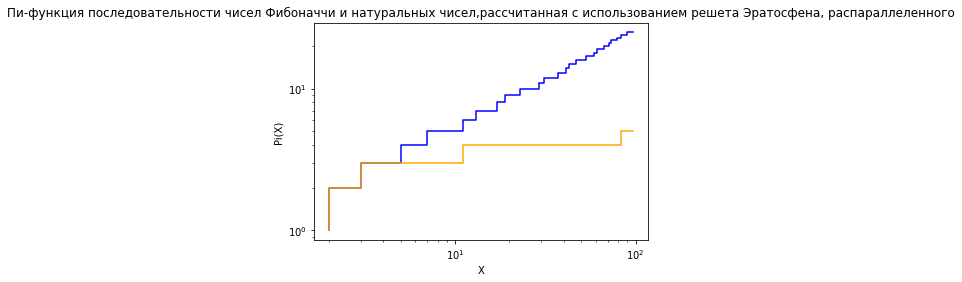

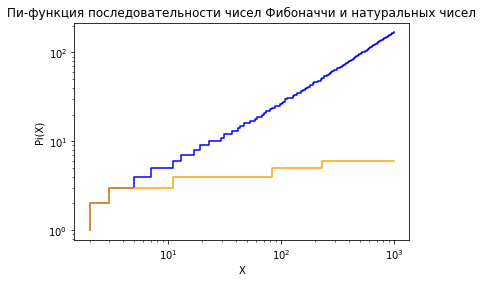

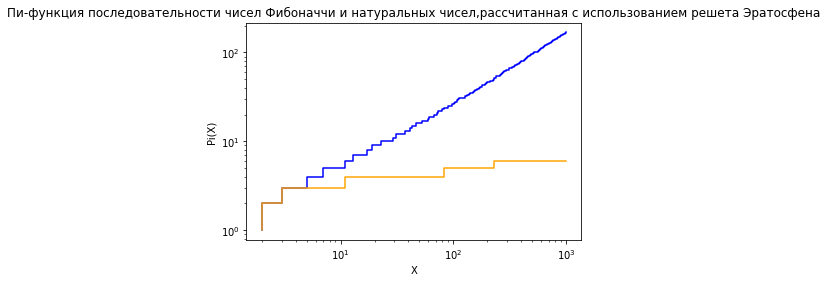

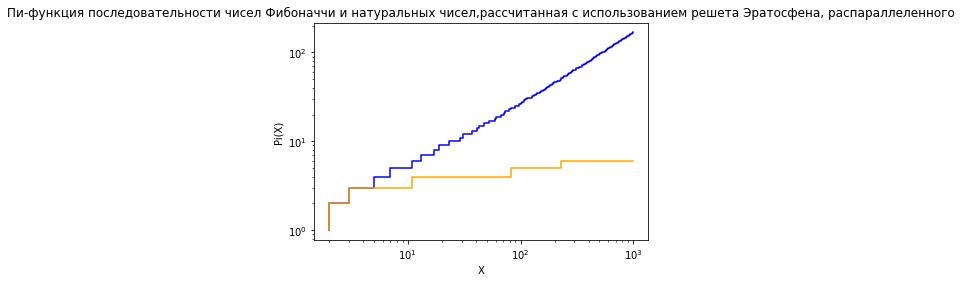

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np

#Функция заполняет пустой массив числами Фибоначчи, не превосходящими заданный супремум
# и возвращает заполненный массив, 
def Fib_numbers_fill(supremum, Fib_array):
    #Сначала разберем отдельно случаи, в которых супремум меньше 2 (тривиальные)
    if supremum < 0:
        return Fib_array
    elif supremum < 1:
        Fib_array.append(0)
        return Fib_array
    elif supremum < 2:
        Fib_array.append(0)
        Fib_array.append(1)
        Fib_array.append(1)
        return Fib_array
    #Основной случай:
    else:
        #Добавляем первые 3 элемента и устанавливаем ими рабочии переменные:
        #последнее число Фибоначчи и 2 предпоследних
        Fib_array.append(0)
        Fib_array.append(1)
        Fib_array.append(1)
        Fib_num_1 = 1
        Fib_num_2 = 1
        Fib_num = 2
        #Пока последнее число не превосходит заданный супремум, добавляем к массиву последнее число
        #затем пересчитываем предпоследние (сдвигом), затем считаем последнее, как их сумму
        while Fib_num <= supremum:
            Fib_array.append(Fib_num)
            Fib_num_1 = Fib_num_2
            Fib_num_2 = Fib_num
            Fib_num = Fib_num_1 + Fib_num_2

        return Fib_array


#Функция проверки числа на простоту
def is_a_prime_number(number):
    #Если число не целое или <= 1, то не простое
    if number <= 1 or isinstance(number, int) == False:
        return False
    is_prime = True

    i = 2
    #обычный поиск делителей, который пробегает до корня из числа
    while i * i <= number:
        if number % i == 0:
            is_prime = False
            break
        i += 1

    return is_prime

#Функция, считающая количество простых чисел в массиве (чисел Фибоначчи)
def count_primes(array):
    count = 0

    for i in range(len(array)):
        if is_a_prime_number(array[i]):
            count += 1

    return count

#Решето Эратосфена
def sieve_Eratosphene(n):
    sieve = list(range(2, n))
    #print(sieve)
    for i in range(2, int(n**0.5) + 1):
        #print(i)
        if i in sieve:
            for j in range(i * i, n, i):
                if j in sieve:
                    sieve.remove(j)
                #print(j)
            
        
    return sieve

#Решето Эратосфена, распараллеленное
from multiprocessing import Process, Array
#Прочистка решета 1 элементом, эта функция будет параллельно ыполняться по разным элементам
def strain(i, n, sieve):
    for j in range(i * i, n, i):
        sieve[j - 2] = False  # Устанавливаем соответствующий индекс в False

def sieve_Eratosphene_paralleled(n):
    # Инициализируем массив True для всех чисел от 2 до n-1
    sieve = Array('b', [True] * (n - 2))  # 'b' - тип для boolean (True/False)
    
    p = []
    for i in range(2, int(n**0.5) + 1):
        process = Process(target=strain, args=(i, n, sieve))
        p.append(process)
        process.start()
    
    for process in p:
        process.join()
    
    # Формируем список простых чисел
    prime_numbers = [i + 2 for i in range(len(sieve)) if sieve[i]]
    
    return prime_numbers

#Функция,считающая количество простых чисел в массиве через решето Эратосфена
def count_primes_by_sieve_Eratosphene(array):
    count = 0
    arr = list(array)
    sieve = sieve_Eratosphene(arr[-1] + 1)
    
    for i in array:
        if i in sieve:
            count += 1
    
    return count

#Функция,считающая количество простых чисел в массиве через решето Эратосфена, распараллеленное
def count_primes_by_sieve_Eratosphene_paralleled(array):
    count = 0
    arr = list(array)
    sieve = sieve_Eratosphene_paralleled(arr[-1] + 1)
    
    for i in array:
        if i in sieve:
            count += 1
    
    return count


#Функция, которая берет массив чисел Фибоначчи и возвращает массив, с только простыми числами Фибоначчи
#Для того, чтобы создать все точки скачков пи-функции для построения ее ступенчатого графика
def cut_composites(array_Fibb):
    arr_Fib_prime = []
    
    for i in array_Fibb:
        if is_a_prime_number(i):
            arr_Fib_prime.append(i)
    
    return arr_Fib_prime

#Функция, аналогичная cut_composites, но использующая решето Эратосфена
def cut_composites_by_sieve_Eratosphene(array):
    arr_prime = []
    
    sieve = sieve_Eratosphene(array[-1])
    
    for i in array:
        if i in sieve:
            arr_prime.append(i)
        
    return arr_prime

#Функция, аналогичная cut_composites, но использующая решето Эратосфена, распараллеленное
def cut_composites_by_sieve_Eratosphene_paralleled(array):
    arr_prime = []
    
    sieve = sieve_Eratosphene_paralleled(array[-1])
    
    for i in array:
        if i in sieve:
            arr_prime.append(i)
        
    return arr_prime

#Функция подсчета значения пи-функции числа
#Создается массив, заполненный числами Фибоначчи, не превосходящими, данное число,
# и затем подсчитывается, сколько из них простые
def Pi_func_Fib(x):
    Fib_numbers = []
    Fib_numbers = Fib_numbers_fill(x, Fib_numbers)
    pi_F = count_primes(Fib_numbers)
    return pi_F

#Функция возвращающая пи-функцию натуральных чисел
def Pi_func(x):
    array = range(2, int(x) + 1)
    pi_f = count_primes(array)
    return pi_f

#Функция, для подсчета пи-функции чисел Фибоначчи, использующая решето Эратосфена
def Pi_func_Fib_using_sieve_Eratosphene(x):
    Fib_numbers = []
    Fib_numbers = Fib_numbers_fill(x, Fib_numbers)
    pi_F = count_primes_by_sieve_Eratosphene(Fib_numbers)
    return pi_F

#Функция, для подсчета пи-функции натуральных чисел, использующая решето Эратосфена
def Pi_func_using_sieve_Eratosphene(x):
    array = range(2, int(x) + 1)
    pi_f = count_primes_by_sieve_Eratosphene(array)
    return pi_f

#Функция, для подсчета пи-функции чисел Фибоначчи, использующая решето Эратосфена, распараллеленное
def Pi_func_Fib_using_sieve_Eratosphene_paralleled(x):
    Fib_numbers = []
    Fib_numbers = Fib_numbers_fill(x, Fib_numbers)
    pi_F = count_primes_by_sieve_Eratosphene_paralleled(Fib_numbers)
    return pi_F

#Функция, для подсчета пи-функции натуральных чисел, использующая решето Эратосфена, распараллеленное
def Pi_func_using_sieve_Eratosphene_paralleled(x):
    array = range(2, int(x) + 1)
    pi_f = count_primes_by_sieve_Eratosphene_paralleled(array)
    return pi_f

#Функция построения графика пи-функции (точечный график), максимальное значение аргумента - заданная степень десяти
def pi_func_plot(deg_max):
    x = []
    y = []
    y_Fib = []

    #Генерируются значения аргументов(степени десятки с шагом 0.5), по ним высчитываются их пи-функции
    for i in range(deg_max * 2):#18 possible but slow
        x.append(10**(i / 2))
        y_Fib.append(Pi_func_Fib(x[i]))
        y.append(Pi_func(x[i]))

    print(x)
    print(y)
    #Построение графика, через датафрейм и библиотеку seaborn
    data = pd.DataFrame({
    'x': x,
    'Pi(x)': y,
    'Pi_Fib(x)': y_Fib 
    })
    #data.show()
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='x', y='Pi(x)')
    sns.scatterplot(data=data, x='x', y='Pi_Fib(x)')

    plt.xscale('log')
    plt.yscale('log')

    plt.title('Пи-функция последовательности чисел Фибоначчи и натуральных чисел')
    plt.xlabel('X')
    plt.ylabel('Pi(X)')

    plt.show()
    

#Другое построение графика: ступенчатое, более соответствующее математическому    
def pi_func_plot_2(deg_max):
    x = []
    y = []
    y_Fib = []

    #Аргументы генерируются не как степени десятки, а как простые числа Фибоначчи, на которых происходят скачки
    #x = Fib_numbers_fill(10**deg_max, x)
    x = cut_composites(range(2, 10**deg_max))
    for i in range(len(x)):
        y.append(Pi_func(x[i]))
        y_Fib.append(Pi_func_Fib(x[i]))
    
    '''print(x)
    print(y)
    print(y_Fib)'''

    #Построение
    plt.plot(x, y, drawstyle='steps-pre', label='Pi(x)', color='blue')
    plt.plot(x, y_Fib, drawstyle='steps-pre', label='Pi_Fib(x)', color='orange')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Пи-функция последовательности чисел Фибоначчи и натуральных чисел')
    plt.xlabel('X')
    plt.ylabel('Pi(X)')
    plt.show()
    
def pi_func_plot_2_using_sieve_Eratosphene(deg_max):
    x = []
    y = []
    y_Fib = []

    #Аргументы генерируются не как степени десятки, а как простые числа Фибоначчи, на которых происходят скачки
    #x = Fib_numbers_fill(10**deg_max, x)
    x = cut_composites_by_sieve_Eratosphene(range(2, 10**deg_max))
    for i in range(len(x)):
        y.append(Pi_func_using_sieve_Eratosphene(x[i]))
        y_Fib.append(Pi_func_Fib_using_sieve_Eratosphene(x[i]))
    
    '''print(x)
    print(y)
    print(y_Fib)'''

    #Построение
    plt.plot(x, y, drawstyle='steps-pre', label='Pi(x)', color='blue')
    plt.plot(x, y_Fib, drawstyle='steps-pre', label='Pi_Fib(x)', color='orange')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Пи-функция последовательности чисел Фибоначчи и натуральных чисел,рассчитанная с использованием решета Эратосфена')
    plt.xlabel('X')
    plt.ylabel('Pi(X)')
    plt.show()
    
def pi_func_plot_2_using_sieve_Eratosphene_paralleled(deg_max):
    x = []
    y = []
    y_Fib = []

    #Аргументы генерируются не как степени десятки, а как простые числа Фибоначчи, на которых происходят скачки
    #x = Fib_numbers_fill(10**deg_max, x)
    x = cut_composites_by_sieve_Eratosphene_paralleled(range(2, 10**deg_max))
    for i in range(len(x)):
        y.append(Pi_func_using_sieve_Eratosphene_paralleled(x[i]))
        y_Fib.append(Pi_func_Fib_using_sieve_Eratosphene_paralleled(x[i]))
    
    '''print(x)
    print(y)
    print(y_Fib)'''

    #Построение
    plt.plot(x, y, drawstyle='steps-pre', label='Pi(x)', color='blue')
    plt.plot(x, y_Fib, drawstyle='steps-pre', label='Pi_Fib(x)', color='orange')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Пи-функция последовательности чисел Фибоначчи и натуральных чисел,рассчитанная с использованием решета Эратосфена, распараллеленного')
    plt.xlabel('X')
    plt.ylabel('Pi(X)')
    plt.show()

    

#pi_func_plot(5)#18 possible but slow
pi_func_plot_2(2)
pi_func_plot_2_using_sieve_Eratosphene(2)
pi_func_plot_2_using_sieve_Eratosphene_paralleled(2)
pi_func_plot_2(3)
pi_func_plot_2_using_sieve_Eratosphene(3)
pi_func_plot_2_using_sieve_Eratosphene_paralleled(3)
#pi_func_plot_2(6)
#pi_func_plot_2(8)#для 9 долго считает, график для 8 почти не отличается от 6


    
    



# Завсиимость времени построения графика, от максимального аргумента пи-функции

Время выполнения: 0.0001 секунд
Время выполнения: 0.0001 секунд
Время выполнения: 0.0000 секунд
Время выполнения: 0.0000 секунд
Время выполнения: 0.0000 секунд
Время выполнения с использованием решета Эратосфена: 0.0001 секунд
Время выполнения с использованием решета Эратосфена: 0.0001 секунд
Время выполнения с использованием решета Эратосфена: 0.0001 секунд
Время выполнения с использованием решета Эратосфена: 0.0001 секунд
Время выполнения с использованием решета Эратосфена: 0.0001 секунд
Время выполнения с использованием решета Эратосфена, распараллеленного: 0.1168 секунд
Время выполнения с использованием решета Эратосфена, распараллеленного: 0.1218 секунд
Время выполнения с использованием решета Эратосфена, распараллеленного: 0.1106 секунд
Время выполнения с использованием решета Эратосфена, распараллеленного: 0.1140 секунд
Время выполнения с использованием решета Эратосфена, распараллеленного: 0.1144 секунд
Время выполнения: 0.0011 секунд
Время выполнения: 0.0010 секунд
Время выпол

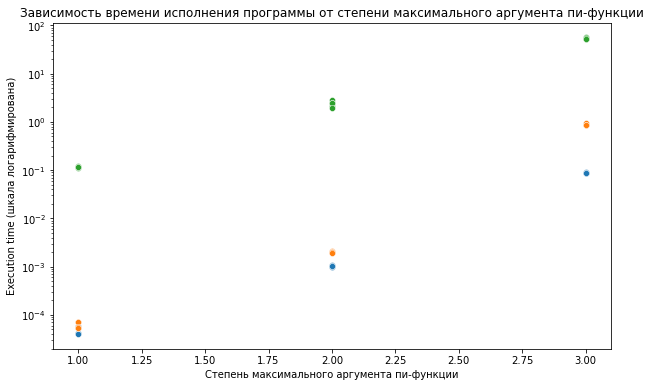

In [22]:
#Функция, производящаяя, все действия функции строящей график, кроме самого построения
# и считающая затраченное время
def pi_func_plot_time_measure(deg_max):
    start_time = time.time()
    x = []
    y = []
    y_Fib = []

    #Аргументы генерируются не как степени десятки, а как простые числа Фибоначчи, на которых происходят скачки
    #x = Fib_numbers_fill(10**deg_max, x)
    x = cut_composites(range(2, 10**deg_max))
    for i in range(len(x)):
        y.append(Pi_func(x[i]))
        y_Fib.append(Pi_func_Fib(x[i]))

    end_time = time.time()  

    execution_time = end_time - start_time
    print(f"Время выполнения: {execution_time:.4f} секунд")

    return execution_time

def pi_func_plot_time_measure_Eratosphene(deg_max):
    start_time = time.time()
    x = []
    y = []
    y_Fib = []

    #Аргументы генерируются не как степени десятки, а как простые числа Фибоначчи, на которых происходят скачки
    #x = Fib_numbers_fill(10**deg_max, x)
    x = cut_composites_by_sieve_Eratosphene(range(2, 10**deg_max))
    for i in range(len(x)):
        y.append(Pi_func_using_sieve_Eratosphene(x[i]))
        y_Fib.append(Pi_func_Fib_using_sieve_Eratosphene(x[i]))

    end_time = time.time()  

    execution_time = end_time - start_time
    print(f"Время выполнения с использованием решета Эратосфена: {execution_time:.4f} секунд")

    return execution_time

def pi_func_plot_time_measure_Eratosphene_paralleled(deg_max):
    start_time = time.time()
    x = []
    y = []
    y_Fib = []

    #Аргументы генерируются не как степени десятки, а как простые числа Фибоначчи, на которых происходят скачки
    #x = Fib_numbers_fill(10**deg_max, x)
    x = cut_composites_by_sieve_Eratosphene_paralleled(range(2, 10**deg_max))
    for i in range(len(x)):
        y.append(Pi_func_using_sieve_Eratosphene_paralleled(x[i]))
        y_Fib.append(Pi_func_Fib_using_sieve_Eratosphene_paralleled(x[i]))

    end_time = time.time()  

    execution_time = end_time - start_time
    print(f"Время выполнения с использованием решета Эратосфена, распараллеленного: {execution_time:.4f} секунд")

    return execution_time

    

    
#Функция, которая строит зависимость времени выполнения построения графика пи-функции
#от степени максимального его аргумента
def plot_execution_time(deg_max):
    deg = []
    ex_time = []
    ex_time_Eratosphene = []
    ex_time_Eratosphene_paralleled = []
    for i in range(1, deg_max + 1):
        #обавляем значение аргумента, несколько раз для равенства количества точек
        deg.append(i)
        deg.append(i)
        deg.append(i)
        deg.append(i)
        deg.append(i)
        #Добавляем значения времеи выполнения с обычной проверкой на простоту
        ex_t_1 = pi_func_plot_time_measure(i)
        ex_t_2 = pi_func_plot_time_measure(i)
        ex_t_3 = pi_func_plot_time_measure(i)
        ex_t_4 = pi_func_plot_time_measure(i)
        ex_t_5 = pi_func_plot_time_measure(i)
        #print("Время выполнения программы " + str(ex_t) + " секунд")
        #ex_time.append((ex_t_1 + ex_t_2 + ex_t_3 + ex_t_4 + ex_t_5) / 5)
        ex_time.append(ex_t_1)
        ex_time.append(ex_t_2)
        ex_time.append(ex_t_3)
        ex_time.append(ex_t_4)
        ex_time.append(ex_t_5)
        # Добавляем значения времени выполнения с использованием решета Эратосфена
        ex_t_1 = pi_func_plot_time_measure_Eratosphene(i)
        ex_t_2 = pi_func_plot_time_measure_Eratosphene(i)
        ex_t_3 = pi_func_plot_time_measure_Eratosphene(i)
        ex_t_4 = pi_func_plot_time_measure_Eratosphene(i)
        ex_t_5 = pi_func_plot_time_measure_Eratosphene(i)
        
        ex_time_Eratosphene.append(ex_t_1)
        ex_time_Eratosphene.append(ex_t_2)
        ex_time_Eratosphene.append(ex_t_3)
        ex_time_Eratosphene.append(ex_t_4)
        ex_time_Eratosphene.append(ex_t_5)
        
        # Добавляем значения времени выполнения с использованием решета Эратосфена, распараллеленного
        ex_t_1 = pi_func_plot_time_measure_Eratosphene_paralleled(i)
        ex_t_2 = pi_func_plot_time_measure_Eratosphene_paralleled(i)
        ex_t_3 = pi_func_plot_time_measure_Eratosphene_paralleled(i)
        ex_t_4 = pi_func_plot_time_measure_Eratosphene_paralleled(i)
        ex_t_5 = pi_func_plot_time_measure_Eratosphene_paralleled(i)
        
        ex_time_Eratosphene_paralleled.append(ex_t_1)
        ex_time_Eratosphene_paralleled.append(ex_t_2)
        ex_time_Eratosphene_paralleled.append(ex_t_3)
        ex_time_Eratosphene_paralleled.append(ex_t_4)
        ex_time_Eratosphene_paralleled.append(ex_t_5)

    data = pd.DataFrame({
    'deg x': deg,
    'Execution_time': ex_time,
    'Execution_time_Eratosphene': ex_time_Eratosphene,
    'Execution_time_Eratosphene_paralleled': ex_time_Eratosphene_paralleled
        
    })

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='deg x', y='Execution_time')
    sns.scatterplot(data=data, x='deg x', y='Execution_time_Eratosphene')
    sns.scatterplot(data=data, x='deg x', y='Execution_time_Eratosphene_paralleled')

    plt.yscale('log')

    plt.title('Зависимость времени исполнения программы от степени максимального аргумента пи-функции')
    plt.xlabel('Степень максимального аргумента пи-функции')
    plt.ylabel('Execution time (шкала логарифмирована)')

    plt.show()
        
plot_execution_time(3)
    


    
    


Попробуем исследовать зависимость времени исполнения программы отдельно для пи-функции натуральных чисел и чисел Фибоначчи

Отдельно для пи-функции в последовательности Фибоначчи (все вычисления для обычной пи-функции закомментированы)

Время выполнения: 0.0000 секунд
Время выполнения: 0.0000 секунд
Время выполнения: 0.0000 секунд
Время выполнения: 0.0000 секунд
Время выполнения: 0.0000 секунд
Время выполнения с использованием решета Эратосфена: 0.0001 секунд
Время выполнения с использованием решета Эратосфена: 0.0000 секунд
Время выполнения с использованием решета Эратосфена: 0.0000 секунд
Время выполнения с использованием решета Эратосфена: 0.0000 секунд
Время выполнения с использованием решета Эратосфена: 0.0000 секунд
Время выполнения с использованием решета Эратосфена, распараллеленного: 0.1125 секунд
Время выполнения с использованием решета Эратосфена, распараллеленного: 0.0913 секунд
Время выполнения с использованием решета Эратосфена, распараллеленного: 0.1013 секунд
Время выполнения с использованием решета Эратосфена, распараллеленного: 0.0900 секунд
Время выполнения с использованием решета Эратосфена, распараллеленного: 0.0745 секунд
Время выполнения: 0.0003 секунд
Время выполнения: 0.0002 секунд
Время выпол

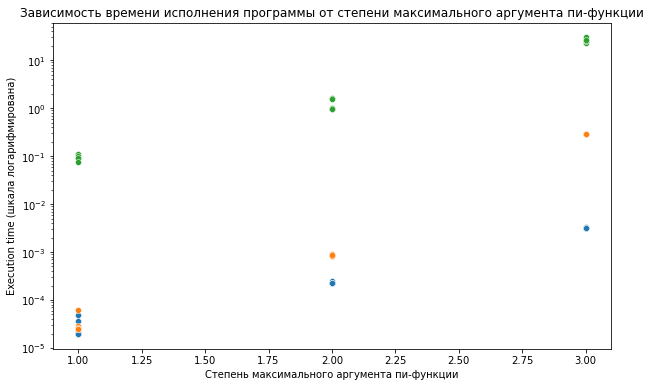

In [24]:
#Функция, производящаяя, все действия функции строящей график, кроме самого построения
# и считающая затраченное время
def pi_func_plot_time_measure(deg_max):
    start_time = time.time()
    x = []
    #y = []
    y_Fib = []

    #Аргументы генерируются не как степени десятки, а как простые числа Фибоначчи, на которых происходят скачки
    #x = Fib_numbers_fill(10**deg_max, x)
    x = cut_composites(range(2, 10**deg_max))
    for i in range(len(x)):
        #y.append(Pi_func(x[i]))
        y_Fib.append(Pi_func_Fib(x[i]))

    end_time = time.time()  

    execution_time = end_time - start_time
    print(f"Время выполнения: {execution_time:.4f} секунд")

    return execution_time

def pi_func_plot_time_measure_Eratosphene(deg_max):
    start_time = time.time()
    x = []
    #y = []
    y_Fib = []

    #Аргументы генерируются не как степени десятки, а как простые числа Фибоначчи, на которых происходят скачки
    #x = Fib_numbers_fill(10**deg_max, x)
    x = cut_composites_by_sieve_Eratosphene(range(2, 10**deg_max))
    for i in range(len(x)):
        #y.append(Pi_func_using_sieve_Eratosphene(x[i]))
        y_Fib.append(Pi_func_Fib_using_sieve_Eratosphene(x[i]))

    end_time = time.time()  

    execution_time = end_time - start_time
    print(f"Время выполнения с использованием решета Эратосфена: {execution_time:.4f} секунд")

    return execution_time

def pi_func_plot_time_measure_Eratosphene_paralleled(deg_max):
    start_time = time.time()
    x = []
    #y = []
    y_Fib = []

    #Аргументы генерируются не как степени десятки, а как простые числа Фибоначчи, на которых происходят скачки
    #x = Fib_numbers_fill(10**deg_max, x)
    x = cut_composites_by_sieve_Eratosphene_paralleled(range(2, 10**deg_max))
    for i in range(len(x)):
        #y.append(Pi_func_using_sieve_Eratosphene_paralleled(x[i]))
        y_Fib.append(Pi_func_Fib_using_sieve_Eratosphene_paralleled(x[i]))

    end_time = time.time()  

    execution_time = end_time - start_time
    print(f"Время выполнения с использованием решета Эратосфена, распараллеленного: {execution_time:.4f} секунд")

    return execution_time

    

    
#Функция, которая строит зависимость времени выполнения построения графика пи-функции
#от степени максимального его аргумента
def plot_execution_time(deg_max):
    deg = []
    ex_time = []
    ex_time_Eratosphene = []
    ex_time_Eratosphene_paralleled = []
    for i in range(1, deg_max + 1):
        #обавляем значение аргумента, несколько раз для равенства количества точек
        deg.append(i)
        deg.append(i)
        deg.append(i)
        deg.append(i)
        deg.append(i)
        #Добавляем значения времеи выполнения с обычной проверкой на простоту
        ex_t_1 = pi_func_plot_time_measure(i)
        ex_t_2 = pi_func_plot_time_measure(i)
        ex_t_3 = pi_func_plot_time_measure(i)
        ex_t_4 = pi_func_plot_time_measure(i)
        ex_t_5 = pi_func_plot_time_measure(i)
        #print("Время выполнения программы " + str(ex_t) + " секунд")
        #ex_time.append((ex_t_1 + ex_t_2 + ex_t_3 + ex_t_4 + ex_t_5) / 5)
        ex_time.append(ex_t_1)
        ex_time.append(ex_t_2)
        ex_time.append(ex_t_3)
        ex_time.append(ex_t_4)
        ex_time.append(ex_t_5)
        # Добавляем значения времени выполнения с использованием решета Эратосфена
        ex_t_1 = pi_func_plot_time_measure_Eratosphene(i)
        ex_t_2 = pi_func_plot_time_measure_Eratosphene(i)
        ex_t_3 = pi_func_plot_time_measure_Eratosphene(i)
        ex_t_4 = pi_func_plot_time_measure_Eratosphene(i)
        ex_t_5 = pi_func_plot_time_measure_Eratosphene(i)
        
        ex_time_Eratosphene.append(ex_t_1)
        ex_time_Eratosphene.append(ex_t_2)
        ex_time_Eratosphene.append(ex_t_3)
        ex_time_Eratosphene.append(ex_t_4)
        ex_time_Eratosphene.append(ex_t_5)
        
        # Добавляем значения времени выполнения с использованием решета Эратосфена, распараллеленного
        ex_t_1 = pi_func_plot_time_measure_Eratosphene_paralleled(i)
        ex_t_2 = pi_func_plot_time_measure_Eratosphene_paralleled(i)
        ex_t_3 = pi_func_plot_time_measure_Eratosphene_paralleled(i)
        ex_t_4 = pi_func_plot_time_measure_Eratosphene_paralleled(i)
        ex_t_5 = pi_func_plot_time_measure_Eratosphene_paralleled(i)
        
        ex_time_Eratosphene_paralleled.append(ex_t_1)
        ex_time_Eratosphene_paralleled.append(ex_t_2)
        ex_time_Eratosphene_paralleled.append(ex_t_3)
        ex_time_Eratosphene_paralleled.append(ex_t_4)
        ex_time_Eratosphene_paralleled.append(ex_t_5)

    data = pd.DataFrame({
    'deg x': deg,
    'Execution_time': ex_time,
    'Execution_time_Eratosphene': ex_time_Eratosphene,
    'Execution_time_Eratosphene_paralleled': ex_time_Eratosphene_paralleled
        
    })

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='deg x', y='Execution_time')
    sns.scatterplot(data=data, x='deg x', y='Execution_time_Eratosphene')
    sns.scatterplot(data=data, x='deg x', y='Execution_time_Eratosphene_paralleled')

    plt.yscale('log')

    plt.title('Зависимость времени исполнения программы от степени максимального аргумента пи-функции')
    plt.xlabel('Степень максимального аргумента пи-функции')
    plt.ylabel('Execution time (шкала логарифмирована)')

    plt.show()
        
plot_execution_time(3)

Отдельно для пи-функции натуральных чисел

Время выполнения: 0.0000 секунд
Время выполнения: 0.0000 секунд
Время выполнения: 0.0000 секунд
Время выполнения: 0.0000 секунд
Время выполнения: 0.0000 секунд
Время выполнения с использованием решета Эратосфена: 0.0001 секунд
Время выполнения с использованием решета Эратосфена: 0.0001 секунд
Время выполнения с использованием решета Эратосфена: 0.0000 секунд
Время выполнения с использованием решета Эратосфена: 0.0000 секунд
Время выполнения с использованием решета Эратосфена: 0.0000 секунд
Время выполнения с использованием решета Эратосфена, распараллеленного: 0.0763 секунд
Время выполнения с использованием решета Эратосфена, распараллеленного: 0.0717 секунд
Время выполнения с использованием решета Эратосфена, распараллеленного: 0.0825 секунд
Время выполнения с использованием решета Эратосфена, распараллеленного: 0.0740 секунд
Время выполнения с использованием решета Эратосфена, распараллеленного: 0.0789 секунд
Время выполнения: 0.0009 секунд
Время выполнения: 0.0008 секунд
Время выпол

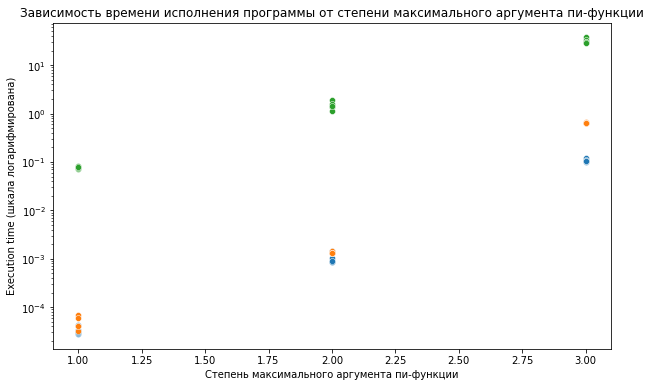

In [28]:
#Функция, производящаяя, все действия функции строящей график, кроме самого построения
# и считающая затраченное время
def pi_func_plot_time_measure(deg_max):
    start_time = time.time()
    x = []
    y = []
    #y_Fib = []

    #Аргументы генерируются не как степени десятки, а как простые числа Фибоначчи, на которых происходят скачки
    #x = Fib_numbers_fill(10**deg_max, x)
    x = cut_composites(range(2, 10**deg_max))
    for i in range(len(x)):
        y.append(Pi_func(x[i]))
        #y_Fib.append(Pi_func_Fib(x[i]))

    end_time = time.time()  

    execution_time = end_time - start_time
    print(f"Время выполнения: {execution_time:.4f} секунд")

    return execution_time

def pi_func_plot_time_measure_Eratosphene(deg_max):
    start_time = time.time()
    x = []
    y = []
    #y_Fib = []

    #Аргументы генерируются не как степени десятки, а как простые числа Фибоначчи, на которых происходят скачки
    #x = Fib_numbers_fill(10**deg_max, x)
    x = cut_composites_by_sieve_Eratosphene(range(2, 10**deg_max))
    for i in range(len(x)):
        y.append(Pi_func_using_sieve_Eratosphene(x[i]))
        #y_Fib.append(Pi_func_Fib_using_sieve_Eratosphene(x[i]))

    end_time = time.time()  

    execution_time = end_time - start_time
    print(f"Время выполнения с использованием решета Эратосфена: {execution_time:.4f} секунд")

    return execution_time

def pi_func_plot_time_measure_Eratosphene_paralleled(deg_max):
    start_time = time.time()
    x = []
    y = []
    #y_Fib = []

    #Аргументы генерируются не как степени десятки, а как простые числа Фибоначчи, на которых происходят скачки
    #x = Fib_numbers_fill(10**deg_max, x)
    x = cut_composites_by_sieve_Eratosphene_paralleled(range(2, 10**deg_max))
    for i in range(len(x)):
        y.append(Pi_func_using_sieve_Eratosphene_paralleled(x[i]))
        #y_Fib.append(Pi_func_Fib_using_sieve_Eratosphene_paralleled(x[i]))

    end_time = time.time()  

    execution_time = end_time - start_time
    print(f"Время выполнения с использованием решета Эратосфена, распараллеленного: {execution_time:.4f} секунд")

    return execution_time

    

    
#Функция, которая строит зависимость времени выполнения построения графика пи-функции
#от степени максимального его аргумента
def plot_execution_time(deg_max):
    deg = []
    ex_time = []
    ex_time_Eratosphene = []
    ex_time_Eratosphene_paralleled = []
    for i in range(1, deg_max + 1):
        #обавляем значение аргумента, несколько раз для равенства количества точек
        deg.append(i)
        deg.append(i)
        deg.append(i)
        deg.append(i)
        deg.append(i)
        #Добавляем значения времеи выполнения с обычной проверкой на простоту
        ex_t_1 = pi_func_plot_time_measure(i)
        ex_t_2 = pi_func_plot_time_measure(i)
        ex_t_3 = pi_func_plot_time_measure(i)
        ex_t_4 = pi_func_plot_time_measure(i)
        ex_t_5 = pi_func_plot_time_measure(i)
        #print("Время выполнения программы " + str(ex_t) + " секунд")
        #ex_time.append((ex_t_1 + ex_t_2 + ex_t_3 + ex_t_4 + ex_t_5) / 5)
        ex_time.append(ex_t_1)
        ex_time.append(ex_t_2)
        ex_time.append(ex_t_3)
        ex_time.append(ex_t_4)
        ex_time.append(ex_t_5)
        # Добавляем значения времени выполнения с использованием решета Эратосфена
        ex_t_1 = pi_func_plot_time_measure_Eratosphene(i)
        ex_t_2 = pi_func_plot_time_measure_Eratosphene(i)
        ex_t_3 = pi_func_plot_time_measure_Eratosphene(i)
        ex_t_4 = pi_func_plot_time_measure_Eratosphene(i)
        ex_t_5 = pi_func_plot_time_measure_Eratosphene(i)
        
        ex_time_Eratosphene.append(ex_t_1)
        ex_time_Eratosphene.append(ex_t_2)
        ex_time_Eratosphene.append(ex_t_3)
        ex_time_Eratosphene.append(ex_t_4)
        ex_time_Eratosphene.append(ex_t_5)
        
        # Добавляем значения времени выполнения с использованием решета Эратосфена, распараллеленного
        ex_t_1 = pi_func_plot_time_measure_Eratosphene_paralleled(i)
        ex_t_2 = pi_func_plot_time_measure_Eratosphene_paralleled(i)
        ex_t_3 = pi_func_plot_time_measure_Eratosphene_paralleled(i)
        ex_t_4 = pi_func_plot_time_measure_Eratosphene_paralleled(i)
        ex_t_5 = pi_func_plot_time_measure_Eratosphene_paralleled(i)
        
        ex_time_Eratosphene_paralleled.append(ex_t_1)
        ex_time_Eratosphene_paralleled.append(ex_t_2)
        ex_time_Eratosphene_paralleled.append(ex_t_3)
        ex_time_Eratosphene_paralleled.append(ex_t_4)
        ex_time_Eratosphene_paralleled.append(ex_t_5)

    data = pd.DataFrame({
    'deg x': deg,
    'Execution_time': ex_time,
    'Execution_time_Eratosphene': ex_time_Eratosphene,
    'Execution_time_Eratosphene_paralleled': ex_time_Eratosphene_paralleled
        
    })

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='deg x', y='Execution_time')
    sns.scatterplot(data=data, x='deg x', y='Execution_time_Eratosphene')
    sns.scatterplot(data=data, x='deg x', y='Execution_time_Eratosphene_paralleled')

    plt.yscale('log')

    plt.title('Зависимость времени исполнения программы от степени максимального аргумента пи-функции')
    plt.xlabel('Степень максимального аргумента пи-функции')
    plt.ylabel('Execution time (шкала логарифмирована)')

    plt.show()
        
plot_execution_time(3)
    

# Решето Эратосфена

Сравнение обычного и параллельного решета Эратосфена

In [31]:
from multiprocessing import Process, Array
#Просеивание решета отдельным элементом
def strain(i, n, sieve):
    for j in range(i * i, n, i):
        sieve[j - 2] = False  # Устанавливаем соответствующий индекс в False

#Решето Эратосфена с параллельным просеиванием решета отдельными элеменатами
def sieve_Eratosphene_paralleled(n):
    # Инициализируем массив True для всех чисел от 2 до n-1
    sieve = Array('b', [True] * (n - 2))  # 'b' - тип для boolean (True/False)
    
    p = []
    for i in range(2, int(n**0.5) + 1):
        process = Process(target=strain, args=(i, n, sieve))
        p.append(process)
        process.start()
    
    for process in p:
        process.join()
    
    # Формируем список простых чисел
    prime_numbers = [i + 2 for i in range(len(sieve)) if sieve[i]]
    
    return prime_numbers

#print(sieve_Eratosphene_paralleled(1000000))

import time
#Время выполнения параллельного решета
t_0 = time.time()
sieve = sieve_Eratosphene_paralleled(20000)
t_1 = time.time()
print(t_1 - t_0)

#print(sieve)

#Обычное решето Эратосфена
def sieve_Eratosphene(n):
    sieve = list(range(2, n))
    #print(sieve)
    for i in range(2, int(n**0.5) + 1):
        #print(i)
        if i in sieve:
            for j in range(i * i, n, i):
                if j in sieve:
                    sieve.remove(j)
                #print(j)
            
        
    return sieve

#Время выполнения обычным решетом
t_0 = time.time()
sieve = sieve_Eratosphene(20000)
t_1 = time.time()
print(t_1 - t_0)

#print(sieve)


1.5675358772277832
4.0383594036102295
